# Overview
**If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?**

**This project based on **


**538 article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

**Github Link for CODE and CSV Files : [Amir Ibrahim Tag](https://github.com/amiribrahimtag/Data-Analysis-Projects/tree/main/Python%20Online%20Movie%20Ratings%20Analysis%20Project)**

## Questions to Answer

**1- Is there a conflict of interest for a website that both sells tickets and display review ratings?**

**2 -Does website like fandango artificially display higher review ratings to sell more movie tickets**


### the data

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_sites = pd.read_csv("all_sites_scores.csv")
fandango = pd.read_csv("fandango_scrape.csv")

## Exploring Fandango Displayed Scores versus True User Ratings

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### => Exploring the relationship between popularity of a film and its rating

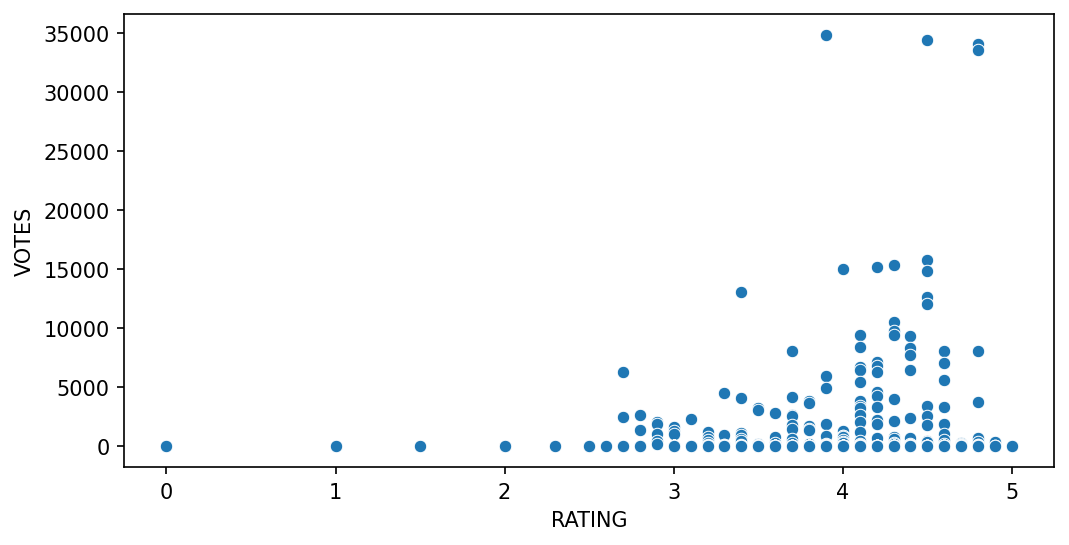

In [6]:
plt.figure(figsize=(8,4),dpi=150) #adjusting plot size and sharping it
sns.scatterplot(data=fandango,x='RATING',y="VOTES"); #semicolin to remove 

In [7]:
fandango.corr() # to calculate the correlation between the columns

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
# creating new column 'YEAR' by striping the year from title column
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))
fandango['YEAR'] = fandango['YEAR'].astype(int) # Change new column datatype to integer instead of string
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   YEAR    504 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 17.8+ KB


In [9]:
fandango['YEAR'].value_counts() #almost all movies in 2015

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

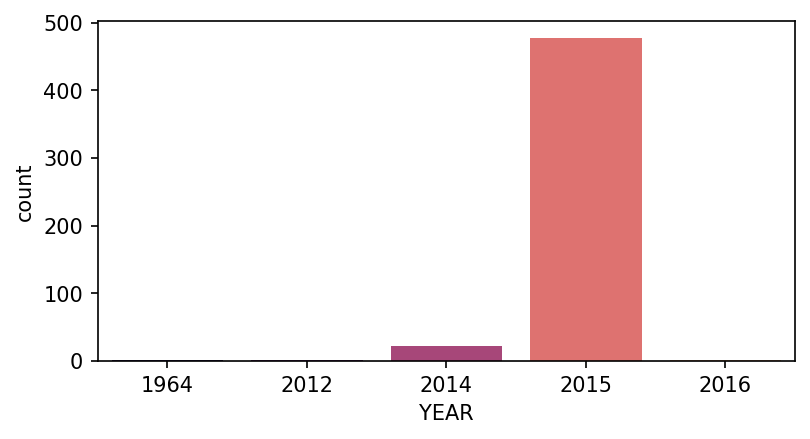

In [10]:
plt.figure(figsize=(6,3),dpi=150)
sns.countplot(data=fandango,x='YEAR',palette='magma');

### What are the 10 movies with the highest number of votes?

In [11]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### How many movies have 0 Votes?

In [12]:
zero_votes = fandango['VOTES']==0
zero_votes.sum()

69

In [13]:
# creating new dataframe for reviewed movies only
only_reviewed_movies = fandango[fandango['VOTES']>0]
print(fandango['VOTES'].count()- only_reviewed_movies.count())

FILM      69
STARS     69
RATING    69
VOTES     69
YEAR      69
dtype: int64


### Now let's Compare user true rating to stars showing by fandango and visualize this difference in distributions

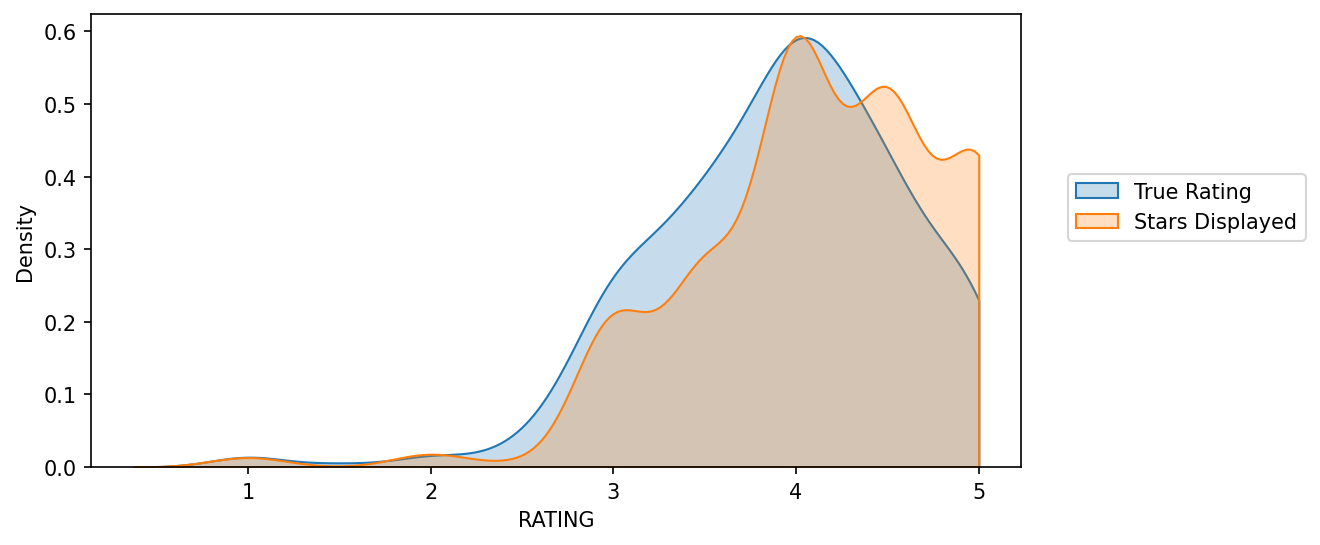

In [14]:
plt.figure(figsize=(8,4),dpi=150)
sns.kdeplot(data=only_reviewed_movies,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=only_reviewed_movies,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5)); # moving the legend outside the viz

### Now we need to calculate the difference between True Rating and Fandango Stars displayed

In [15]:
only_reviewed_movies['STARS_DIFF'] = only_reviewed_movies['STARS'] - only_reviewed_movies['RATING']
only_reviewed_movies['STARS_DIFF'] = only_reviewed_movies['STARS_DIFF'].round(2)
only_reviewed_movies # ignore the warning below its not actual error

<ipython-input-15-307926807d7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_reviewed_movies['STARS_DIFF'] = only_reviewed_movies['STARS'] - only_reviewed_movies['RATING']
<ipython-input-15-307926807d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_reviewed_movies['STARS_DIFF'] = only_reviewed_movies['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### let's count the number of times a certain difference occurs

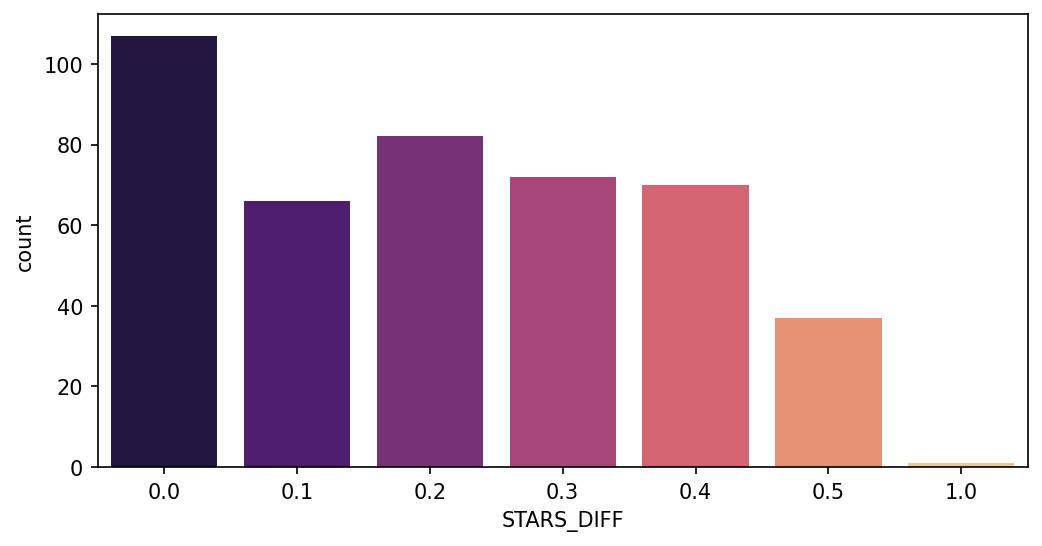

In [16]:
plt.figure(figsize=(8,4),dpi=150)
sns.countplot(data=only_reviewed_movies,x='STARS_DIFF',palette='magma');

### As we can see above from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [17]:
only_reviewed_movies[only_reviewed_movies['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Let's now compare the scores from Fandango to other movies sites and see how they compare

In [18]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [19]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [20]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews

(0.0, 100.0)

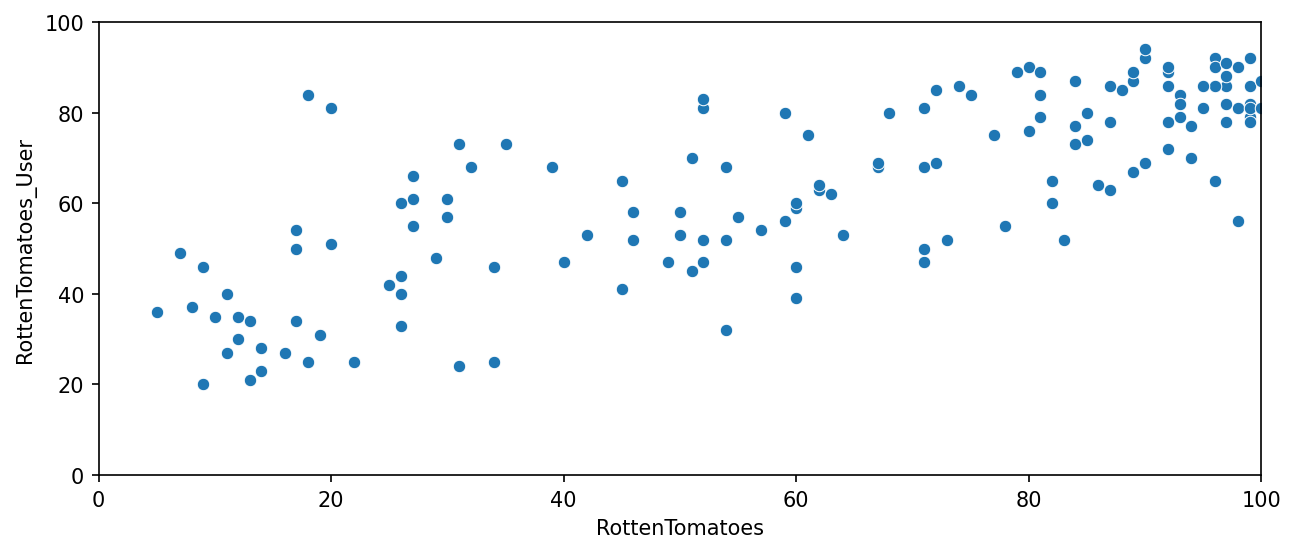

In [21]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100) # editing the limits to view the actual scale

### Now let's calculate the difference between critics ratings and users ratings for Rotten Tomatoes.

In [22]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

**Now we want to calculate the mean of our new column but since we may find negative values (which means users give higher ratings to movies when critics don't) we gonna make sure to take the abslute values before the mean**

In [23]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Lets plot the distribution of the differences between Critics rating Score and User rating Score**

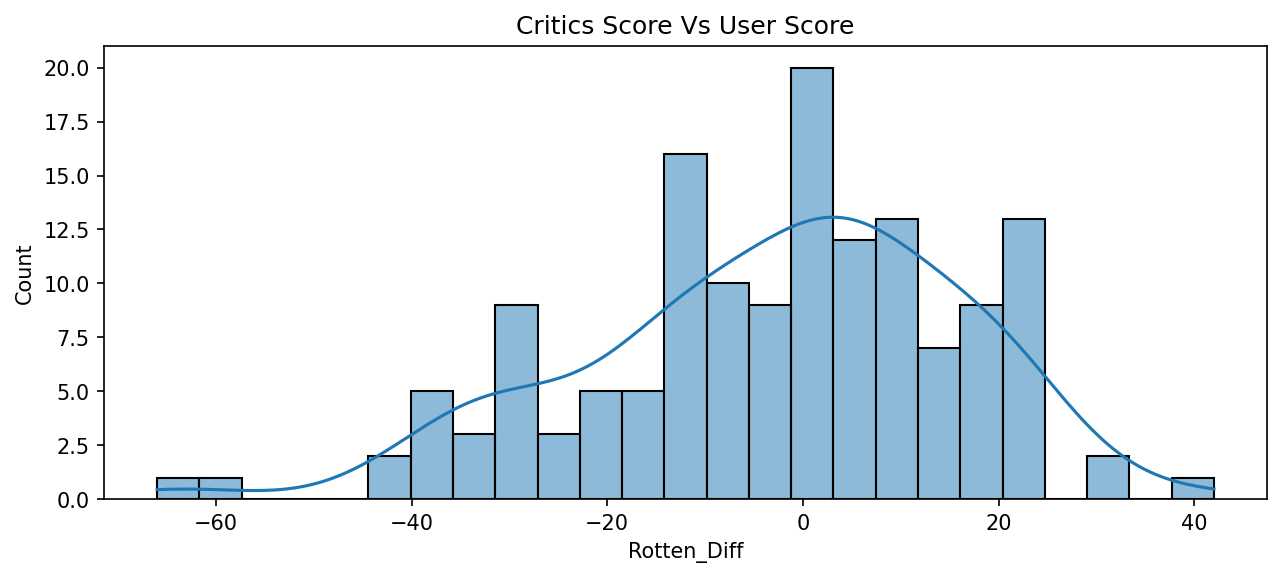

In [24]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x='Rotten_Diff',bins=25,kde=True)
plt.title('Critics Score Vs User Score');

**We can't analyze the viz because of the negative values so lets take the absolute values and find the different**

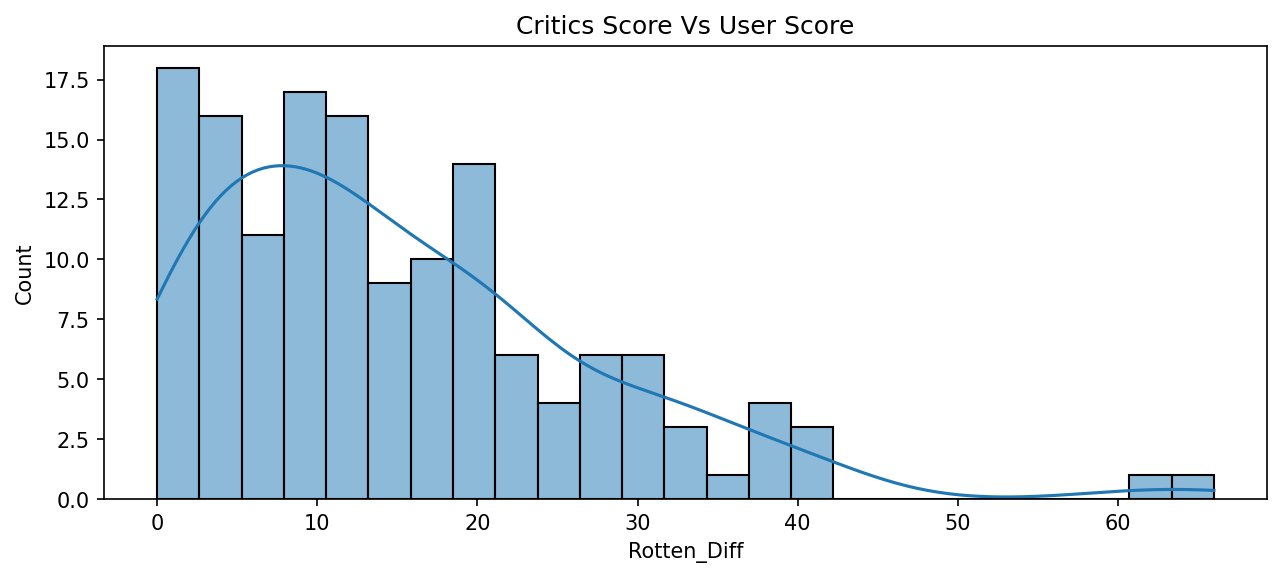

In [25]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title('Critics Score Vs User Score');

**What are the top 5 movies users rated higher than critics on average? that means the smallest negative values**

In [26]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']] # filtering only two columns

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**What are the top 5 movies critics scores higher than users on average? that means the largest positive values**

In [27]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']] # filtering only two columns

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

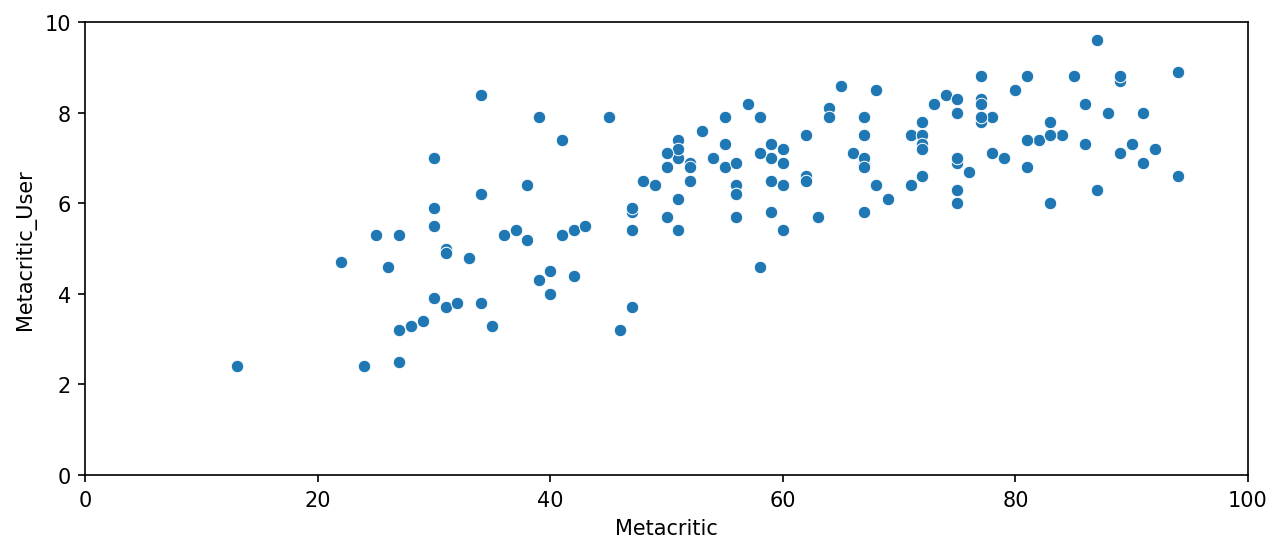

In [28]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100) #because Metacritic range between 0 and 100
plt.ylim(0,10); #because Metacritic_User range between 0 and 10

## IMBD

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Lets find the relationship between vote counts on MetaCritic vs vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

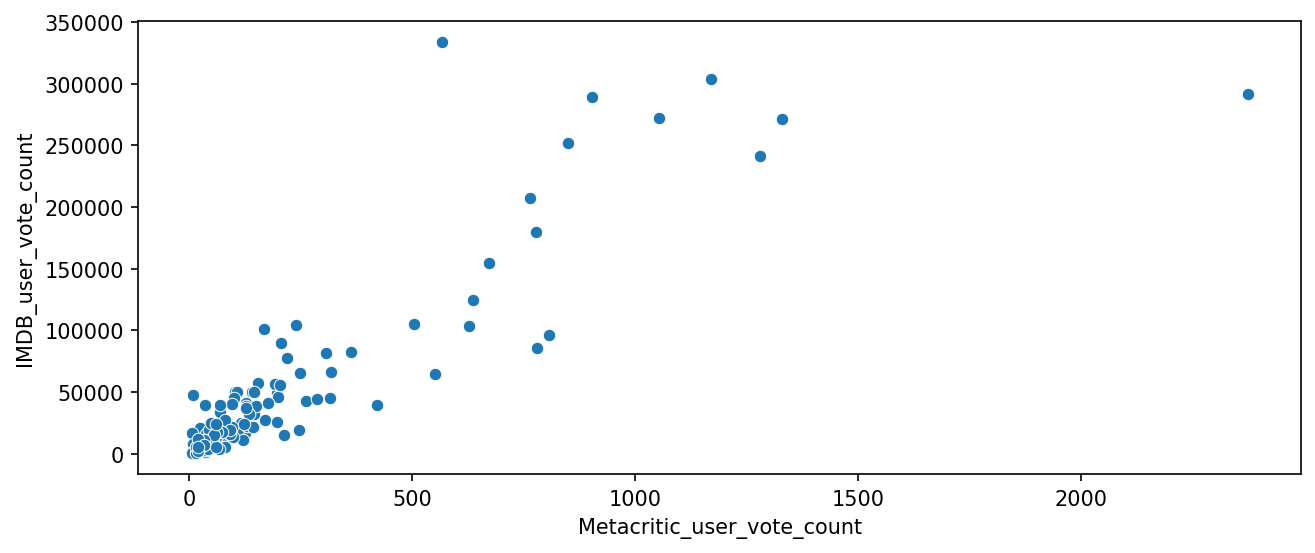

In [29]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**We notice there are two outliers above. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.**

**What movie has the highest IMDB user vote count?**


In [30]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**What movie has the highest Metacritic User Vote count?**

In [31]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**To Compare Fandango scores vs all sites, we need to combine the Fandango Table with the All Sites table.**

**We only want to compare movies that are in both DataFrames so we gonna use inner merge to to merge together both DataFrames based on the 'FILM' columns**

In [32]:
df=pd.merge(fandango,all_sites,on='FILM',how='inner')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int32  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int32(1), int64(7), 

In [34]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [35]:
df.describe()

,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,2014.882759,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,0.322823,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,2014.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,2015.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,2015.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,2015.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,2015.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


### Normalize columns to Fandango STARS and RATINGS 0-5 

We notice that RT,Metacritic, and IMDB don't use a rating score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**first we need to find every rating score range then normalize columns according to its range**

a simple way to convert ratings to 0:5 :
* 100/20 = 5 
* 10/2 = 5


In [36]:
df.describe().transpose()['max'] # showing the max value for all columns

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
YEAR                            2015.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [37]:
# RT Normalized columns
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [38]:
# Meta Normalized columns
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [39]:
# IMDB Normalized column
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

## Creating a norm_scores DataFrame that only contains the normalizes ratings

In [40]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [41]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [42]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

Now we are going to find the answer for our main goal, Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average according to all sites?


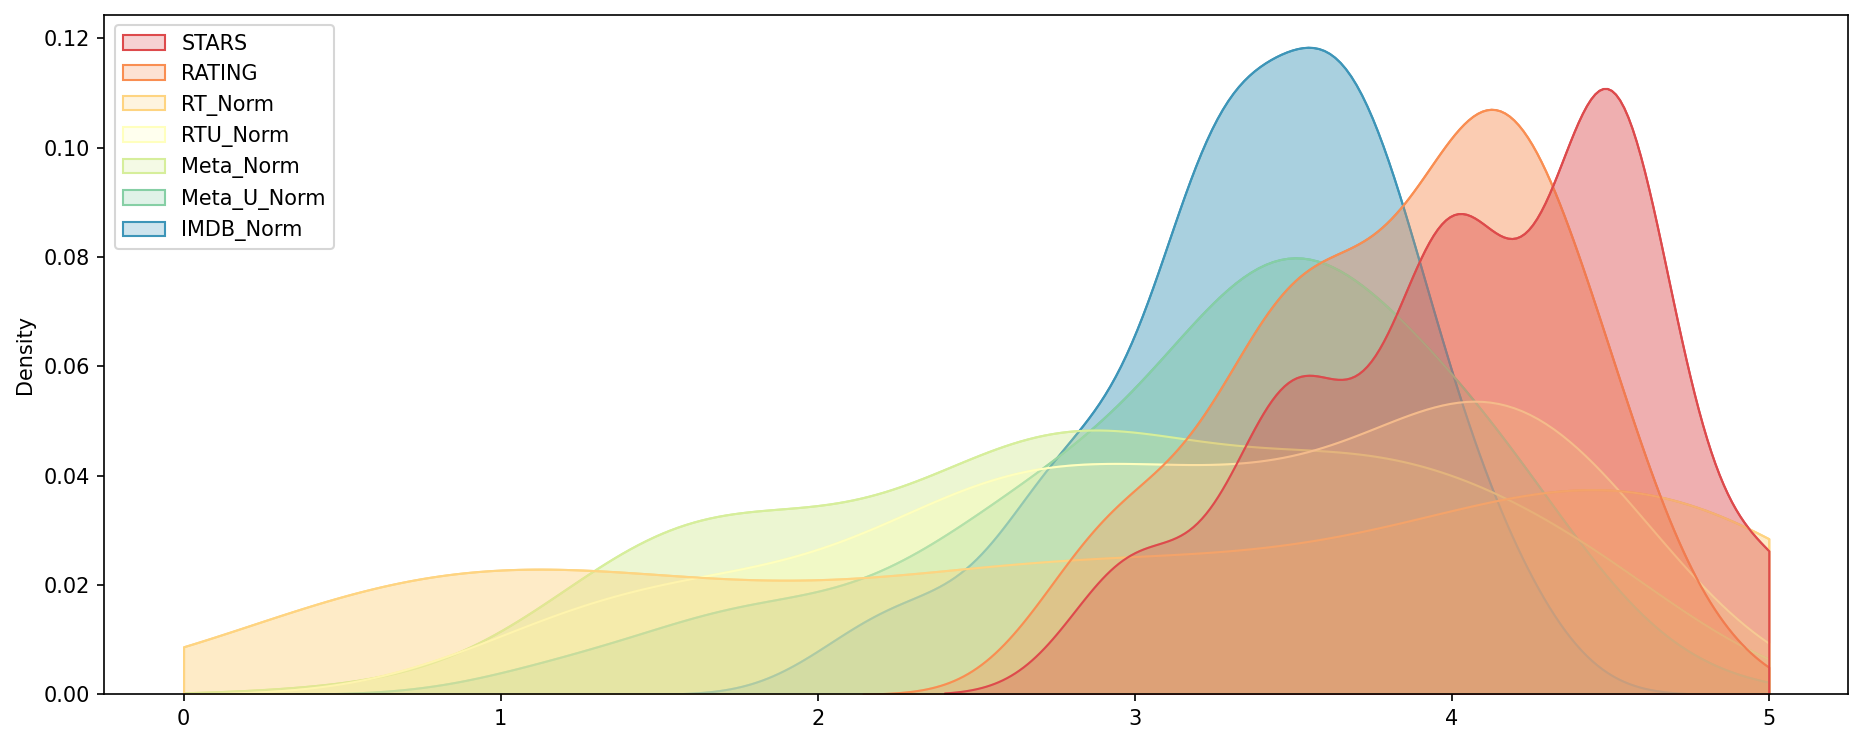

In [43]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Spectral')
# sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='magma')

sns.move_legend(sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Spectral')
,'upper left') # moving the legend to upper left

## Clearly Fandango has an uneven and higher distribution comparing with other sites
**Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings**

In [44]:
# adding Film colum
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']] 

In [45]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


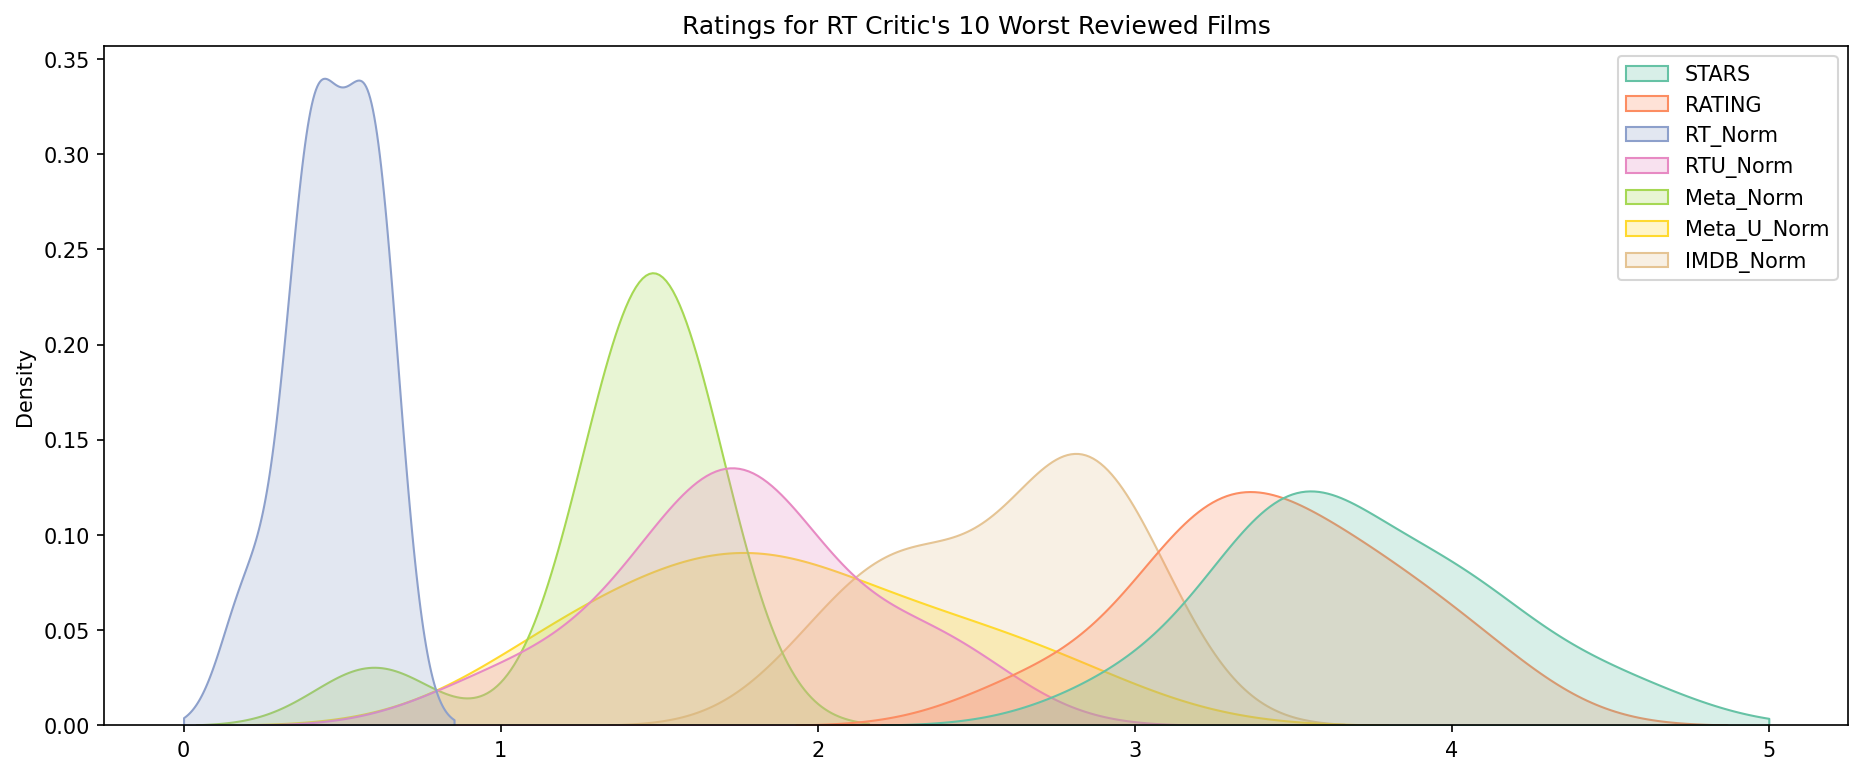

In [46]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm')
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set2')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

## Final thoughts : Fandango is showing around 3-4 star ratings for films that are clearly bad based off the Rotten Tomatoes ratings for the worst 10 movies list .